In [1]:
import re
import requests
from bs4 import BeautifulSoup
import time

# Initialize combined lists for storing data from all URLs
Prices = []
Areas = []
Rooms = []
Sellers = []

# Define a function to scrape data from a given URL
def scrape_data(url):
    local_prices = []
    local_areas = []
    local_rooms = []
    local_sellers = []
    
    for i in range(1, 60):
        page_url = f"{url}&searchlistfor={i}"
        print(f'Scraping from page {i} for {url}')
        time.sleep(1)  # Sleep to avoid overloading the server
        
        # Fetch the page content
        response = requests.get(page_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Prices
        price_elements = soup.find_all('div', {'class': 'clasified-text-rt'})
        for element in price_elements:
            price_text = element.text.strip()
            price_text = re.sub(r'[^\d.]', '', price_text)
            if price_text.endswith('.'):
                price_text = price_text[:-1]
            
            try:
                if "Cr" in element.text:
                    price_value = int(float(price_text) * 100)  # Convert Cr to L
                else:
                    price_value = int(float(price_text)) 
                local_prices.append(price_value)
            except ValueError:
                local_prices.append(None)  

        # Square Feet
        area_elements = soup.find_all('span', {'class': 'area-btm'})
        for element in area_elements:
            area_text = element.get_text(strip=True)
            match = re.search(r'(\d+)\s*sq\.?ft', area_text, re.IGNORECASE)
            if match:
                sqft = match.group(1)
                local_areas.append(sqft)
            else:
                local_areas.append(None)

        # Rooms
        room_elements = soup.find_all('div', {'class': 'head-title-left'})
        for element in room_elements:
            room_text = element.get_text(strip=True)
            matches = re.findall(r'\d+\s*BHK', room_text)
            if matches:
                local_rooms.append(matches[0])  # Only take the first match, assuming one BHK per listing
            else:
                local_rooms.append(None)

        # Sellers
        seller_elements = soup.find_all('div', {'class': 'cal_user_info_name'})
        for element in seller_elements:
            seller_text = element.get_text(strip=True)
            local_sellers.append(seller_text)

    # Ensure all lists are of equal length by filling in missing data with None
    property_count = max(len(local_prices), len(local_areas), len(local_rooms), len(local_sellers))

    while len(local_prices) < property_count:
        local_prices.append(None)
    while len(local_areas) < property_count:
        local_areas.append(None)
    while len(local_rooms) < property_count:
        local_rooms.append(None)
    while len(local_sellers) < property_count:
        local_sellers.append(None)

    return local_prices, local_areas, local_rooms, local_sellers

def main():
    urls = [
        "https://www.realestateindia.com/search.php?searchlistfor=1&search_catg_type%5B%5D=8&min_val=500000&max_val=10000000&allcategory=&allcity=77",
        "https://www.realestateindia.com/search.php?allcategory=8%2C9%2C11%2C12%2C25%2C54%2C55&bedrooms=&comm_prop_type=8&comm_prop_type=9&comm_prop_type=11&comm_prop_type=12&comm_prop_type=25&comm_prop_type=54&comm_prop_type=55&min_val=500000&max_val=1000000000&city=Hyderabad&city_hidden=77&locality%5B%5D=77&searchlistfor=1",
        "https://www.realestateindia.com/search.php?allcategory=8%2C9%2C11%2C12%2C25%2C54%2C55&bedrooms=&comm_prop_type=8&comm_prop_type=9&comm_prop_type=11&comm_prop_type=12&comm_prop_type=25&comm_prop_type=54&comm_prop_type=55&min_val=500000&max_val=1000000000&city=Hyderabad&city_hidden=77&locality%5B%5D=77&searchlistfor=1"
    ]

    for url in urls:
        prices, areas, rooms, sellers = scrape_data(url)
        Prices.extend(prices)
        Areas.extend(areas)
        Rooms.extend(rooms)
        Sellers.extend(sellers)

    # Print the lengths to verify
    print(f"Prices: {len(Prices)}, Areas: {len(Areas)}, Rooms: {len(Rooms)}, Sellers: {len(Sellers)}")

if __name__ == "__main__":
    main()


Scraping from page 1 for https://www.realestateindia.com/search.php?searchlistfor=1&search_catg_type%5B%5D=8&min_val=500000&max_val=10000000&allcategory=&allcity=77
Scraping from page 2 for https://www.realestateindia.com/search.php?searchlistfor=1&search_catg_type%5B%5D=8&min_val=500000&max_val=10000000&allcategory=&allcity=77
Scraping from page 3 for https://www.realestateindia.com/search.php?searchlistfor=1&search_catg_type%5B%5D=8&min_val=500000&max_val=10000000&allcategory=&allcity=77
Scraping from page 4 for https://www.realestateindia.com/search.php?searchlistfor=1&search_catg_type%5B%5D=8&min_val=500000&max_val=10000000&allcategory=&allcity=77
Scraping from page 5 for https://www.realestateindia.com/search.php?searchlistfor=1&search_catg_type%5B%5D=8&min_val=500000&max_val=10000000&allcategory=&allcity=77
Scraping from page 6 for https://www.realestateindia.com/search.php?searchlistfor=1&search_catg_type%5B%5D=8&min_val=500000&max_val=10000000&allcategory=&allcity=77
Scraping f

In [11]:
data_dict = {'Rooms':Rooms,
             'Areas':Areas,
             'Prices':Prices,
             'Sellers':Sellers}

import pandas as pd
max_length = 500 #dependng on your data scraped above

for key in data_dict.keys():
    data_dict[key] += [None] * (max_length - len(data_dict[key]))

data = pd.DataFrame(data_dict)
data
#data.isnull().sum()

,Rooms,Areas,Prices,Sellers
0,2 BHK,1076,67.0,Sadguna PropertiesAgent
1,2 BHK,None,65.0,Rudhra Real EstatesAgent
2,1 BHK,None,27.0,Vaarahi Infra ProjectsAgent
3,2 BHK,None,58.0,Sri Sai Balaji Real Estate & ConstructionsAgent
4,3 BHK,1150,86.0,Premium Properties HyderabadAgent
...,...,...,...,...
495,None,10890,NaN,None
496,None,None,NaN,None
497,None,None,NaN,None
498,None,1350,NaN,None


In [12]:
data.to_csv("Real_Estate.csv")

In [13]:
df = pd.read_csv("Real_Estate.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   Rooms       64 non-null     object 
 2   Areas       132 non-null    float64
 3   Prices      94 non-null     float64
 4   Sellers     132 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   Rooms       64 non-null     object 
 2   Areas       132 non-null    float64
 3   Prices      94 non-null     float64
 4   Sellers     132 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


In [16]:
import sklearn

In [17]:
import numpy as np

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label = LabelEncoder()
label

LabelEncoder()

In [23]:
df['Rooms'] = label.fit_transform(df['Rooms'])
df['Rooms']

0      1
1      1
2      0
3      1
4      2
      ..
495    5
496    5
497    5
498    5
499    5
Name: Rooms, Length: 500, dtype: int64

In [24]:
df['Areas'] = label.fit_transform(df['Areas'])
df['Areas']

0       9
1      42
2      42
3      42
4      11
       ..
495    39
496    42
497    42
498    20
499    42
Name: Areas, Length: 500, dtype: int64

In [25]:
df['Prices'] = label.fit_transform(df['Prices'])
df['Prices']

0      25
1      24
2       9
3      20
4      27
       ..
495    37
496    37
497    37
498    37
499    37
Name: Prices, Length: 500, dtype: int64

In [26]:
df['Sellers'] = label.fit_transform(df['Sellers'])
df['Sellers']

0      28
1      23
2      40
3      35
4      19
       ..
495    47
496    47
497    47
498    47
499    47
Name: Sellers, Length: 500, dtype: int64

In [27]:
label

LabelEncoder()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  500 non-null    int64
 1   Rooms       500 non-null    int64
 2   Areas       500 non-null    int64
 3   Prices      500 non-null    int64
 4   Sellers     500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [29]:
df['Prices'] = df['Prices'].astype('float64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   Rooms       500 non-null    int64  
 2   Areas       500 non-null    int64  
 3   Prices      500 non-null    float64
 4   Sellers     500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


In [36]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
import plotly

In [37]:
df.columns

Index(['Rooms', 'Areas', 'Prices', 'Sellers'], dtype='object')

In [38]:
import plotly.express as px

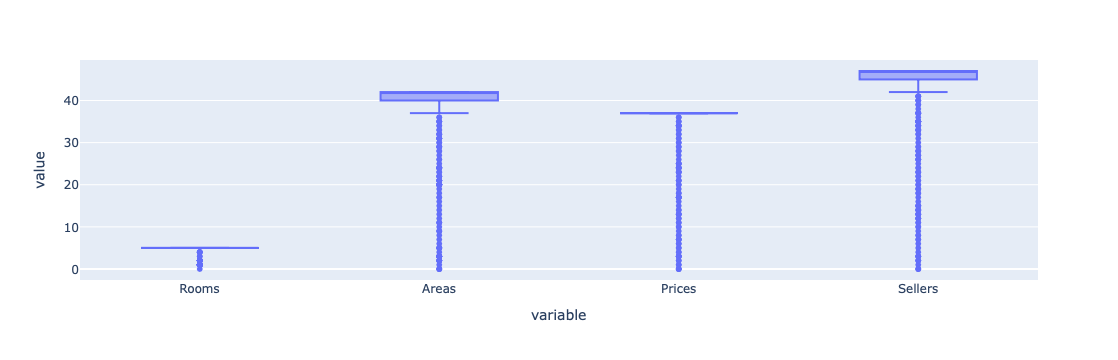

In [39]:
px.box(df)

In [40]:
import plotly.graph_objects as go
import pandas as pd
colors = ['red','blue','green','orange']
fig = go.Figure()

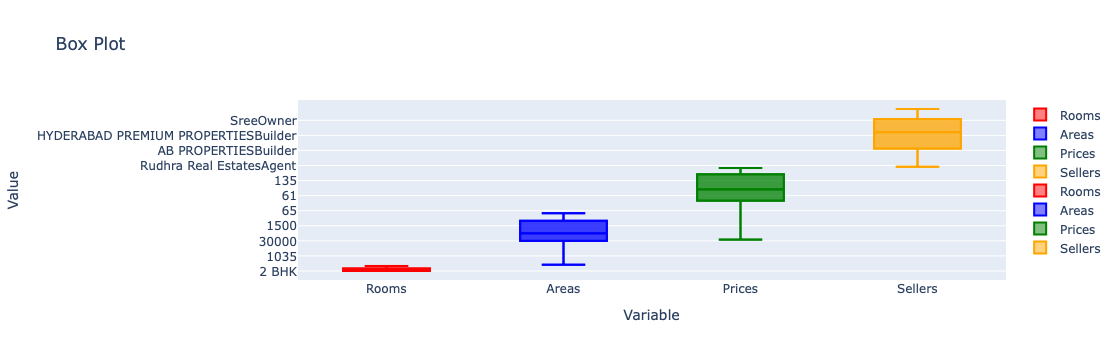

In [46]:
for i, col in enumerate(data.columns):
    fig.add_trace(go.Box(y=data[col], name=col, marker_color=colors[i]))
fig.update_layout(title="Box Plot", yaxis_title="Value", 
                  xaxis_title="Variable")
fig.show()

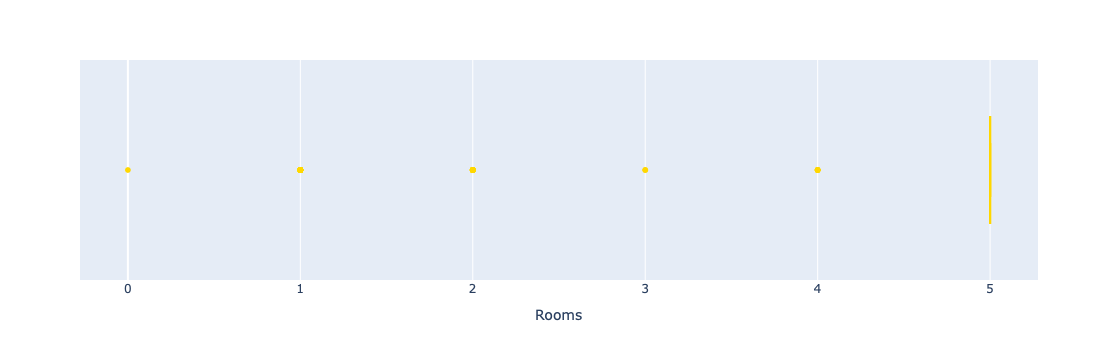

In [42]:
px.box(df,x='Rooms',color_discrete_sequence=['gold'])

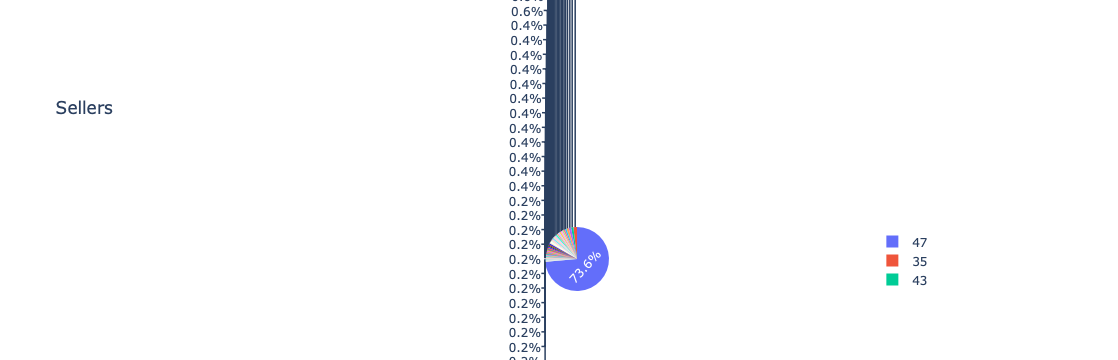

In [44]:
px.pie(df,names='Sellers',title="Sellers")

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rooms    500 non-null    int64  
 1   Areas    500 non-null    int64  
 2   Prices   500 non-null    float64
 3   Sellers  500 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [112]:
def remove_outliers(df,threshold=3):
    "Remove outliers"
    #create a copy of the dataframe
    df_cleaned=df.copy()
    #First based on the threshold value
    #The threshold values determine how far
    #from the first and third quartilies a data point must be to be considered on outlier
    for col in df_cleaned.select_dtypes(include=['int64','float64']).columns:
        Q1=df_cleaned[col].quantile(0.25)#25th percentile
        Q3=df_cleaned[col].quantile(0.75)#75th percentile
        IQR=Q3-Q1#Interquantile Range
        lb=Q1-threshold*IQR
        ub=Q3+threshold*IQR
        #once the upperbound and lowerbound are calculated outliers are found
        df_cleaned=df_cleaned[(df_cleaned[col]>=lb)&(df_cleaned[col]<=ub)]
        return df_cleaned#it returns a new dataframe

In [113]:
final_df = remove_outliers(df)
final_df

,Rooms,Areas,Prices,Sellers
26,5,42,37.0,47
27,5,42,37.0,47
28,5,6,37.0,47
29,5,42,37.0,47
30,5,42,37.0,47
...,...,...,...,...
495,5,39,37.0,47
496,5,42,37.0,47
497,5,42,37.0,47
498,5,20,37.0,47


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [115]:
x = final_df.drop('Prices',axis=1)
y = final_df['Prices']

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rooms    500 non-null    int64  
 1   Areas    500 non-null    int64  
 2   Prices   500 non-null    float64
 3   Sellers  500 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [117]:
import numpy as np
a,b = np.arange(5),range(5)
print(a)
print(b)

[0 1 2 3 4]
range(0, 5)


In [118]:
w,x1,y1,z = train_test_split(a,b,random_state=4)
print(w)
print(x1)
print(y1)
print(z)

[1 4 2]
[0 3]
[1, 4, 2]
[0, 3]


In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.25,
                                                 random_state=56)

In [120]:
print(len(x_train))
print(len(x_test))

327
109


In [121]:
model = LinearRegression()
model

LinearRegression()

In [122]:
model.fit(x_train,y_train)

LinearRegression()

In [123]:
predictions = model.predict(x_test)
#predictions
#Evaluate the metrics
error_rate = mean_squared_error(y_test,predictions)
score = r2_score(y_test,predictions)
print(f'Mean Squared Error is {error_rate}')
print(f'R-Squared Value is {score}')

Mean Squared Error is 42.11701673568192
R-Squared Value is 0.5132844316344355


In [124]:
final_df.head()

,Rooms,Areas,Prices,Sellers
26,5,42,37.0,47
27,5,42,37.0,47
28,5,6,37.0,47
29,5,42,37.0,47
30,5,42,37.0,47


In [126]:
Rooms = int(input('Enter no of rooms: '))
Areas = int(input('Enter size: '))
Sellers = 47  # Example value; this should be a single value, not a list or array

# Create an array for prediction
input_data = np.array([[Rooms, Areas, Sellers]])

# Make a prediction
prediction = model.predict(input_data)
print(prediction)


Enter no of rooms:  3
Enter size:  1200


[24.89717424]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [127]:
import pickle

In [128]:
with open('Real_Estate.pkl','wb') as f:
    pickle.dump(model,f)

In [129]:
pred_model = pickle.load(open('Real_Estate.pkl','rb'))

In [130]:
pred_model.predict(np.array([[Rooms,Areas,Sellers]]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([24.89717424])

In [134]:
!pip install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [135]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [140]:
pip install matplotlib


  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.2-py3-none-any.

In [141]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [145]:
import matplotlib.pyplot as plt

# Ensure sizes match
if len(y_test) == len(y_test_pred):
    plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
    plt.legend()
    plt.show()
else:
    print("Size mismatch: y_test and y_test_pred must be the same size.")



Size mismatch: y_test and y_test_pred must be the same size.


In [147]:
from sklearn.preprocessing import PolynomialFeatures

Training MSE: 19.150654432774466, R2: 0.6502802307597217
Testing MSE: 50.69736561090757, R2: 0.4141276132446331


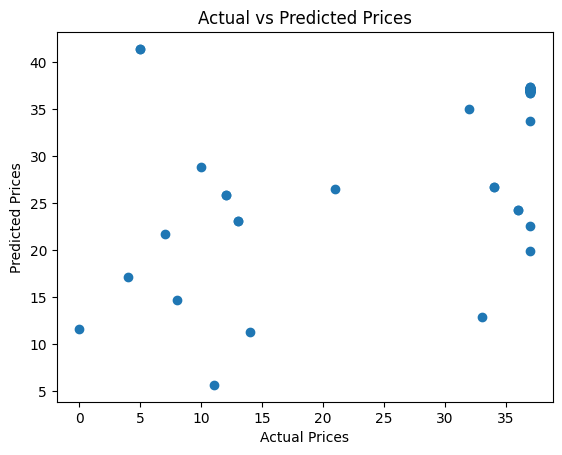

In [148]:
model = LinearRegression()
polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.transform(x_test)
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# For Testing Data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}, R2: {r2_train}")
print(f"Testing MSE: {mse_test}, R2: {r2_test}")
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()